<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b>Project | Simulating a Real-Valued Qubit</b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

We play with a single qubit living on the unit circle.

- _All angles are in radian._
- _Please do not use any quantum programming library or any scientific python library such as `NumPy`._
- _You can use python module `math` and python interface `matplotlib.pyplot`._

### Create a python class called `SingleQubit(theta=0)`

When an instance is created, the quantum state of qubit is set to the specified angle _theta_. If no angle is specified by the user, then the initial state of the qubit will be $\ket{0}$. 

### The basic methods

1. `read_state()`: Return the current quantum state of the qubit.

1. `rotation(theta)`: Update the current quantum state by applying the rotation operator with the angle _theta_.

1. `reflection(theta)`: Update the current quantum state by applying the reflection operator having a reflection axis with angle _theta_.

1. `draw_state()`: Draw the current quantum state as an arrow on the unit circle.

1. `draw_all_states()`: Draw all the quantum states visited on the unit circle starting from the initial one by indicating their visited orders.

1. `reflect_and_draw(theta)`: Draw the unit circle, the current quantum state, the reflection line of the reflection operator, apply the method `reflection(theta)` to the current quantum state, and draw the new quantum state.

1. `prob()`: Return the probabilities of observing state 0 and state 1 if the qubit is measured at this moment.

1. `measure(number_of_shots)`: Simulate the measurement operator _number_of_shots_ times based on the current quantum state, and then return the number(s) of the observed 0’s and 1’s (remark that only a single state is observed after each measurement, i.e., either 0 or 1).

In [162]:
def draw_axes():
    # dummy points for zooming out
    points = [ [1.3,0], [0,1.3], [-1.3,0], [0,-1.3] ] 
    # coordinates for the axes
    arrows = [ [1.1,0], [0,1.1], [-1.1,0], [0,-1.1] ] 

    # drawing dummy points
    for p in points: matplotlib.pyplot.plot(p[0],p[1]+0.2) 
    # drawing the axes
    for a in arrows: matplotlib.pyplot.arrow(0,0,a[0],a[1],head_width=0.04, head_length=0.08) 
        
def draw_qubit():
    # draw a figure
    matplotlib.pyplot.figure(figsize=(6,6), dpi=60)
    # draw the origin
    matplotlib.pyplot.plot(0,0,'ro') # a point in red color
    # drawing the axes by using one of our predefined functions
    draw_axes()
    # drawing the unit circle by using one of our predefined functions
    draw_unit_circle()
    # drawing |0>
    matplotlib.pyplot.plot(1,0,"o")
    matplotlib.pyplot.text(1.05,0.05,"|0>")
    # drawing |1>
    matplotlib.pyplot.plot(0,1,"o")
    matplotlib.pyplot.text(0.05,1.05,"|1>")
    # drawing -|0>
    matplotlib.pyplot.plot(-1,0,"o")
    matplotlib.pyplot.text(-1.2,-0.1,"-|0>")
    # drawing -|1>
    matplotlib.pyplot.plot(0,-1,"o")
    matplotlib.pyplot.text(-0.2,-1.1,"-|1>")
    
def draw_qubit_new_basis():
     # draw a figure
    matplotlib.pyplot.figure(figsize=(6,6), dpi=60)
    # draw the origin
    matplotlib.pyplot.plot(0,0,'ro') # a point in red color
    # drawing the axes by using one of our predefined functions
    draw_axes()
    # drawing the unit circle by using one of our predefined functions
    draw_unit_circle()
    # drawing |0>
    matplotlib.pyplot.plot(1,0,"o")
    matplotlib.pyplot.text(1.05,0.05,"|v1>")
    # drawing |1>
    matplotlib.pyplot.plot(0,1,"o")
    matplotlib.pyplot.text(0.05,1.05,"|v2>")
    # drawing -|0>
    matplotlib.pyplot.plot(-1,0,"o")
    matplotlib.pyplot.text(-1.2,-0.1,"-|v1>")
    # drawing -|1>
    matplotlib.pyplot.plot(0,-1,"o")
    matplotlib.pyplot.text(-0.2,-1.1,"-|v2>")
    


def draw_unit_circle():
    unit_circle= matplotlib.pyplot.Circle((0,0),1,color='black',fill=False)
    matplotlib.pyplot.gca().add_patch(unit_circle) 

In [195]:
#This is completely right
from random import randrange
from math import pi, sin, cos
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib

class SingleQubit:
    def __init__(self):
        self._qc = QuantumCircuit(1,1)
        self._list_of_angles=[]
        self._angle=0
        
    def read_state(self):
        job = execute(self.__qc, Aer.get_backend('statevector_simulator'), shots=1, optimization_level=0)
        counts_statevector=job.result().get_statevector()
        print("The state of the qubit is",counts_statevector)
    
    def rotation(self,theta):
        if theta==None:
            print()
        else:
            self._qc.ry(2*theta,0)
            self._angle=self._angle+theta
            self._list_of_angles.append(self._angle)
            
            
    def reflection(self,theta):
        if theta==None:
            print()
        else:
            self._qc.z(0)
            self._qc.ry(2*theta,0)
            self._qc.ry(2*theta,0)
            self._angle=2*theta-self._angle
            self._list_of_angles.append(self._angle)
            
    def draw_state(self):
        draw_qubit()
        x=cos(self._angle)
        y=sin(self._angle)
        x1 = 0.92 * x
        y1 = 0.92 * y
        matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
       
    
    def draw_all_states(self):
        for i in range(len(self._list_of_angles)):
            x=cos(self._list_of_angles[i])
            y=sin(self._list_of_angles[i])
            x1 = 0.92 * x
            y1 = 0.92 * y
            matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
            matplotlib.pyplot.text(1.2*x1,1.2*y1,"%.i"%i)
        
    def prob(self):
        print("The probability of find the state |0> is",cos(self._angle)**2)
        print("The probability of find the state |1> is",sin(self._angle)**2)
        
    def reflect_and_draw(self,theta):
        draw_qubit()
        x=cos(self._angle)
        y=sin(self._angle)
        x1 = 0.92 * x
        y1 = 0.92 * y
        matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
        matplotlib.pyplot.arrow(-cos(theta),-sin(theta),2*cos(theta),2*sin(theta),head_width=0.04,head_length=0.08,color="red")
        self._qc.z(0)
        self._qc.ry(2*theta,0)
        self._qc.ry(2*theta,0)
        self._angle=2*theta-self._angle
        self._list_of_angles.append(self._angle)
        x2=cos(self._angle)
        y2=sin(self._angle)
        x3 = 0.92 * x2
        y3 = 0.92 * y2
        matplotlib.pyplot.arrow(0,0,x3,y3,head_width=0.04,head_length=0.08,color="blue")
        
    def measure(self,number_of_shots):
        self._qc.measure(0,0)
        job = execute(self._qc,Aer.get_backend('qasm_simulator'),shots=number_of_shots)
        counts = job.result().get_counts(self._qc) 
        print(self._angle)
        print(counts)
        
    def change_basis(self,theta):
        self._angle_former=self._angle
        self._list_of_angles_former=[]
        if theta==0 or theta%(2*pi)==0:
            print("Error")
            self._theta2=0
            self._list_of_angles_former=self._list_of_angles
        else:
            self._theta2=theta
            self._qc.ry(-2*self._theta2,0)
            self._list_of_angles_former=self._list_of_angles
            for i in range(len(self._list_of_angles)):
                self._list_of_angles[i]= self._list_of_angles[i]-self._theta2
        self._angle=self._angle-self._theta2
    
    def draw_state_in_both_basis(self):
        if self._theta2==0 or self._theta2%(2*pi)==0:
            print("Error")
        else:
            draw_qubit() 
            x=cos(self._angle_former)
            y=sin(self._angle_former)
            x1 = 0.92 * x
            y1 = 0.92 * y
            matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
        
            draw_qubit_new_basis() 
            x=cos(self._angle)
            y=sin(self._angle)
            x1 = 0.92 * x
            y1 = 0.92 * y
            matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
        
    def prob_in_both_basis(self):
        if self._theta2==0 or self._theta2%(2*pi)==0:
            print("Error")
        else:
            print("En al base |0> y |1>")
            print("La probabilidad de obtener |0> es",(cos(self._angle_former)**2))
            print("La probabilidad de obtener |1> es",(sin(self._angle_former)**2))
        
            print("En la base |v1> y |v2>")
            print("La probabilidad de obtener |v1> es",(cos(self._angle)**2))
            print("La probabilidad de obtener |v2> es",(sin(self._angle)**2))
    def take_back_basis_change(self):
        for i in range(len(self._list_of_angles)):
            self._list_of_angles[i]= self._list_of_angles[i]+self._theta2
        self._qc.ry(2*self._theta2,0)
        self._angle=self._angle_former

En al base |0> y |1>
La probabilidad de obtener |0> es 0.4477357683661733
La probabilidad de obtener |1> es 0.5522642316338268
En la base |v1> y |v2>
La probabilidad de obtener |v1> es 0.9493970231495835
La probabilidad de obtener |v2> es 0.050602976850416544


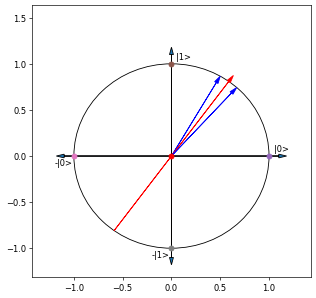

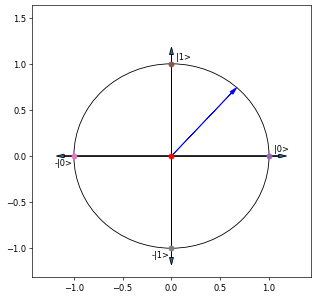

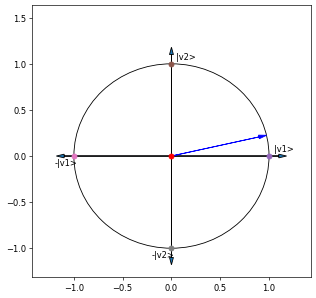

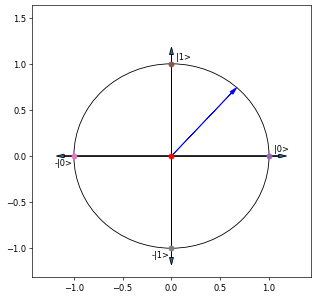

In [197]:
a=SingleQubit()
a.rotation(60*pi/180)
#a.draw_state()
#a.rotation(60*pi/180)
#a.draw_state()
#a.rotation(-20*pi/180)
a.reflect_and_draw(54*pi/180)
#a.reflection(120*pi/180)
#a.draw_state()
#a.rotation(-269*pi/180)
#a.draw_state()
#a.draw_all_states()
#a.read_state()
#a.prob()
#a.measure(10000)
a.change_basis(35*pi/180)
a.draw_state_in_both_basis()
a.prob_in_both_basis()
a.take_back_basis_change()
a.draw_state()

### The extra methods

9. `change_basis(theta)`: Return an error if the basis will remain the same. Change the basis of qubit with the unit vectors $ \ket{v_1} $ and $ \ket{v_2} $ such that 
    - the angles of $ \ket{v_1} $ and $ \ket{v_2} $ are $ \theta $ and $ \theta + \frac{\pi}{2} $ in the standard basis, respectively, and 
    - $\ket{v_1}$ becomes the new $ \ket{0} $ and $ \ket{v_2} $ becomes the new $ \ket{1} $; and then,   
update all visited quantum states until now respectively, i.e, each quantum state in the standard basis should be shifted by $ -\theta $.

2. `draw_state_in_both_basis()`: Return an error if the basis has not changed. Draw two separete unit circles where the basis are the current basis and the previous basis, and then draw the current quantum state as an arrow on each unit circle.

3. `prob_in_both_basis()`: Return an error if the basis has not changed. Return the probabilities of observing state 0 and state 1 in the current and previous bases.

4. `take_back_basis_change()`: Do nothing if there is no basis change. Return back to the previous basis by deleting the latest call of `change_basis()` from the basis history. On the other hand, any quantum state visited after the latest call of `change_basis()` must be kept.

In [163]:
def change_basis(self,theta):
    self._list_of_angles_former=[]
    if theta==0 or theta%(2*pi)==0:
        print("Error")
        self._theta2=0
    else:
        self._theta2=theta
        self_qc.ry(-2*theta,0)
        self._angle_former=self._angle
        self._angle=self._angle-theta
        for i in range(len(self._list_of_angles)):
            self._list_of_angles[i]= self._list_of_angles[i]-theta
    self._list_of_angles_former=self._list_of_angles
    
def draw_state_in_both_basis(self):
    if self._theta2==0 or self._theta2%(2*pi)==0:
        print("Error")
    else:
        print("En al base |0> y |1>")
        draw_qubit() 
        x=cos(self._angle)
        y=sin(self._angle)
        x1 = 0.92 * x
        y1 = 0.92 * y
        matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
        
        print("En la base |v1> y |v2>")
        draw_qubit_new_basis() 
        x=cos(self._angle_new)
        y=sin(self._angle_new)
        x1 = 0.92 * x
        y1 = 0.92 * y
        matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
        
def prob_in_both_basis(self):
    if self._theta2==0 or self._theta2%(2*pi)==0:
        print("Error")
    else:
        print("En al base |0> y |1>")
        print("La probabilidad de obtener |0> es",cos(self._angle)**2)
        print("La probabilidad de obtener |1> es",sin(self._angle)**2)
        
        print("En la base |v1> y |v2>")
        print("La probabilidad de obtener |v1> es",cos(self._angle)**2)
        print("La probabilidad de obtener |v2> es",sin(self._angle)**2)

def take_back_basis_change(self):
    for i in range(len(self_list_of_angles_former)):
            self._list_of_angles[i]= self._list_of_angles[i]+theta

In [97]:
def draw_axes():
    # dummy points for zooming out
    points = [ [1.3,0], [0,1.3], [-1.3,0], [0,-1.3] ] 
    # coordinates for the axes
    arrows = [ [1.1,0], [0,1.1], [-1.1,0], [0,-1.1] ] 

    # drawing dummy points
    for p in points: matplotlib.pyplot.plot(p[0],p[1]+0.2) 
    # drawing the axes
    for a in arrows: matplotlib.pyplot.arrow(0,0,a[0],a[1],head_width=0.04, head_length=0.08) 
        
def draw_qubit():
    # draw a figure
    matplotlib.pyplot.figure(figsize=(6,6), dpi=60)
    # draw the origin
    matplotlib.pyplot.plot(0,0,'ro') # a point in red color
    # drawing the axes by using one of our predefined functions
    draw_axes()
    # drawing the unit circle by using one of our predefined functions
    draw_unit_circle()
    # drawing |0>
    matplotlib.pyplot.plot(1,0,"o")
    matplotlib.pyplot.text(1.05,0.05,"|0>")
    # drawing |1>
    matplotlib.pyplot.plot(0,1,"o")
    matplotlib.pyplot.text(0.05,1.05,"|1>")
    # drawing -|0>
    matplotlib.pyplot.plot(-1,0,"o")
    matplotlib.pyplot.text(-1.2,-0.1,"-|0>")
    # drawing -|1>
    matplotlib.pyplot.plot(0,-1,"o")
    matplotlib.pyplot.text(-0.2,-1.1,"-|1>")
    
def draw_unit_circle():
    unit_circle= matplotlib.pyplot.Circle((0,0),1,color='black',fill=False)
    matplotlib.pyplot.gca().add_patch(unit_circle) 

In [105]:
from random import randrange
from math import pi, sin, cos
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib

        
def read_state(qc):
    job = execute(qc, Aer.get_backend('statevector_simulator'), shots=1, optimization_level=0)
    counts_statevector=job.result().get_statevector()
    return counts_statevector
        
    
def rotation(qc,theta,angle,list_of_angles):
    qc.ry(2*theta,0)
    angle=angle+theta
    list_of_angles.append(angle)
    return qc, angle, list_of_angles
        
                
            
def reflection(qc,theta,angle,list_of_angles):
    qc.z(0)
    qc.ry(2*theta,0)
    qc.ry(2*theta,0)
    angle=2*theta-angle
    list_of_angles.append(angle)
    return qc, angle, list_of_angles
    
        
            
def draw_state(angle):
    draw_qubit()
    x=cos(angle)
    y=sin(angle)
    x1 = 0.92 * x
    y1 = 0.92 * y
    matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")   
    
       
def draw_all_states(list_of_angles):
    for i in range(len(list_of_angles)):
        x=cos(list_of_angles[i])
        y=sin(list_of_angles[i])
        x1 = 0.92 * x
        y1 = 0.92 * y
        matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
            
        
        
def prob(angle):
    print("The probability of find the state |0> is",cos(angle)**2)
    print("The probability of find the state |1> is",sin(angle)**2)
        

def reflect_and_draw(qc,theta,angle,list_of_angles):
    draw_qubit()
    x=cos(angle)
    y=sin(angle)
    x1 = 0.92 * x
    y1 = 0.92 * y
    matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
    matplotlib.pyplot.arrow(-cos(theta),-sin(theta),2*cos(theta),2*sin(theta),head_width=0.04,head_length=0.08,color="red")
    qc.z(0)
    qc.ry(2*theta,0)
    qc.ry(2*theta,0)
    angle=2*theta-angle
    list_of_angles.append(angle)
    x2=cos(angle)
    y2=sin(angle)
    x3 = 0.92 * x2
    y3 = 0.92 * y2
    matplotlib.pyplot.arrow(0,0,x3,y3,head_width=0.04,head_length=0.08,color="blue")
    return qc, angle, list_of_angles
        
        
        
def measure(qc, number_of_shots):
    qc.measure(0,0)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=number_of_shots)
    counts = job.result().get_counts(qc) 
    return qc, counts 
      

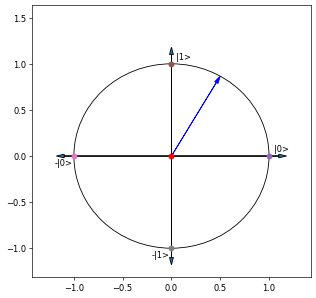

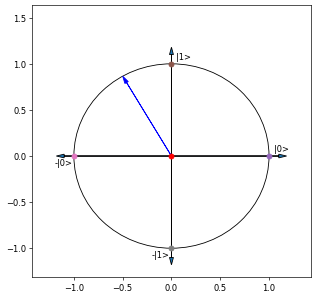

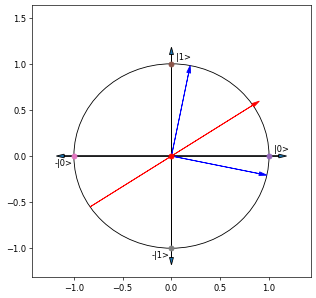

In [107]:
from math import pi, sin, cos
qc = QuantumCircuit(1,1)
list_of_angles=[]
angle=0
qc, angle, list_of_angles=reflection(qc,30*pi/180,angle,list_of_angles)
draw_state(angle)
qc, angle, list_of_angles=rotation(qc,60*pi/180,angle,list_of_angles)
draw_state(angle)
qc, angle, list_of_angles=reflection(qc,54*pi/180,angle,list_of_angles)
qc, angle, list_of_angles=reflect_and_draw(qc,32,angle,list_of_angles)


#display(qc.draw(output="mpl"))